In [28]:
!pip install nltk

^C


In [29]:
import pandas as pd
import nltk

In [30]:
data = pd.read_csv("D:/auralix/Sense/Suicide_Detection.csv")

In [31]:
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [33]:
data.describe()

,Unnamed: 0
count,232074.000000
mean,174152.863518
std,100500.425362
min,2.000000
25%,87049.250000
50%,174358.500000
75%,261285.750000
max,348110.000000


In [34]:
data['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

In [35]:
data['length'] = data['text'].str.len()

In [36]:
# reduced dataset due to slow performance with over 300,000 records
data = data.head(1000)

In [37]:
data['class'].value_counts()
# data for three classes is still roughly equally distributed

class
non-suicide    509
suicide        491
Name: count, dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

array([<Axes: title={'center': 'non-suicide'}>,
       <Axes: title={'center': 'suicide'}>], dtype=object)

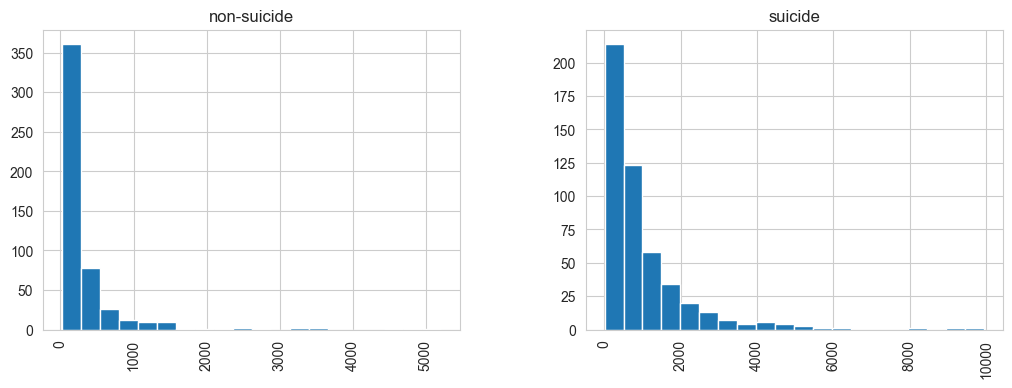

In [39]:
data.hist(column='length', by='class', bins=20, figsize=(12,4))

In [40]:
import string
from nltk.corpus import stopwords

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinayak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [43]:
data['text'].head().apply(text_process)

0    [Ex, Wife, Threatening, SuicideRecently, left,...
1    [weird, dont, get, affected, compliments, comi...
2    [Finally, 2020, almost, never, hear, 2020, bad...
3             [need, helpjust, help, im, crying, hard]
4    [I’m, lostHello, name, Adam, 16, I’ve, struggl...
Name: text, dtype: object

In [45]:
data['text'].apply(text_process)

0      [Ex, Wife, Threatening, SuicideRecently, left,...
1      [weird, dont, get, affected, compliments, comi...
2      [Finally, 2020, almost, never, hear, 2020, bad...
3               [need, helpjust, help, im, crying, hard]
4      [I’m, lostHello, name, Adam, 16, I’ve, struggl...
                             ...                        
995    [Hey, Larhomehttpiimgurcom8nD5jjpg, arms, ones...
996    [YOUTUBE, VIDEO, TIME11, OH, GOD, GUYS111, AMO...
997    [white, top, black, bottom, would, scenery, ou...
998    [galactic, empire, nothing, wrong, 😎, even, re...
999    [Need, pm, supportHello, suicidal, woman, colo...
Name: text, Length: 1000, dtype: object

In [46]:
data.head()

,Unnamed: 0,text,class,length
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,715
1,3,Am I weird I don't get affected by compliments...,non-suicide,138
2,4,Finally 2020 is almost over... So I can never ...,non-suicide,129
3,8,i need helpjust help me im crying so hard,suicide,41
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [49]:
bow_transformer.fit(data['text'])

CountVectorizer(analyzer=<function text_process at 0x000001169868EF20>)

In [50]:
text_bow = bow_transformer.transform(data['text'])

In [51]:
print('Shape of Sparse Matrix:', text_bow.shape)

Shape of Sparse Matrix: (1000, 10444)


In [52]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.46609536576024513


In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf = TfidfTransformer().fit(text_bow)

In [55]:
text_tfidf = tfidf.transform(text_bow)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
msg_train, msg_test, label_train, label_test = train_test_split(text_tfidf, data['class'], test_size=.2)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)

In [59]:
model.fit(msg_train, label_train)

RandomForestClassifier(n_estimators=300)

In [60]:
predictions = model.predict(msg_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

 non-suicide       0.88      0.88      0.88       111
     suicide       0.85      0.84      0.85        89

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

